In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


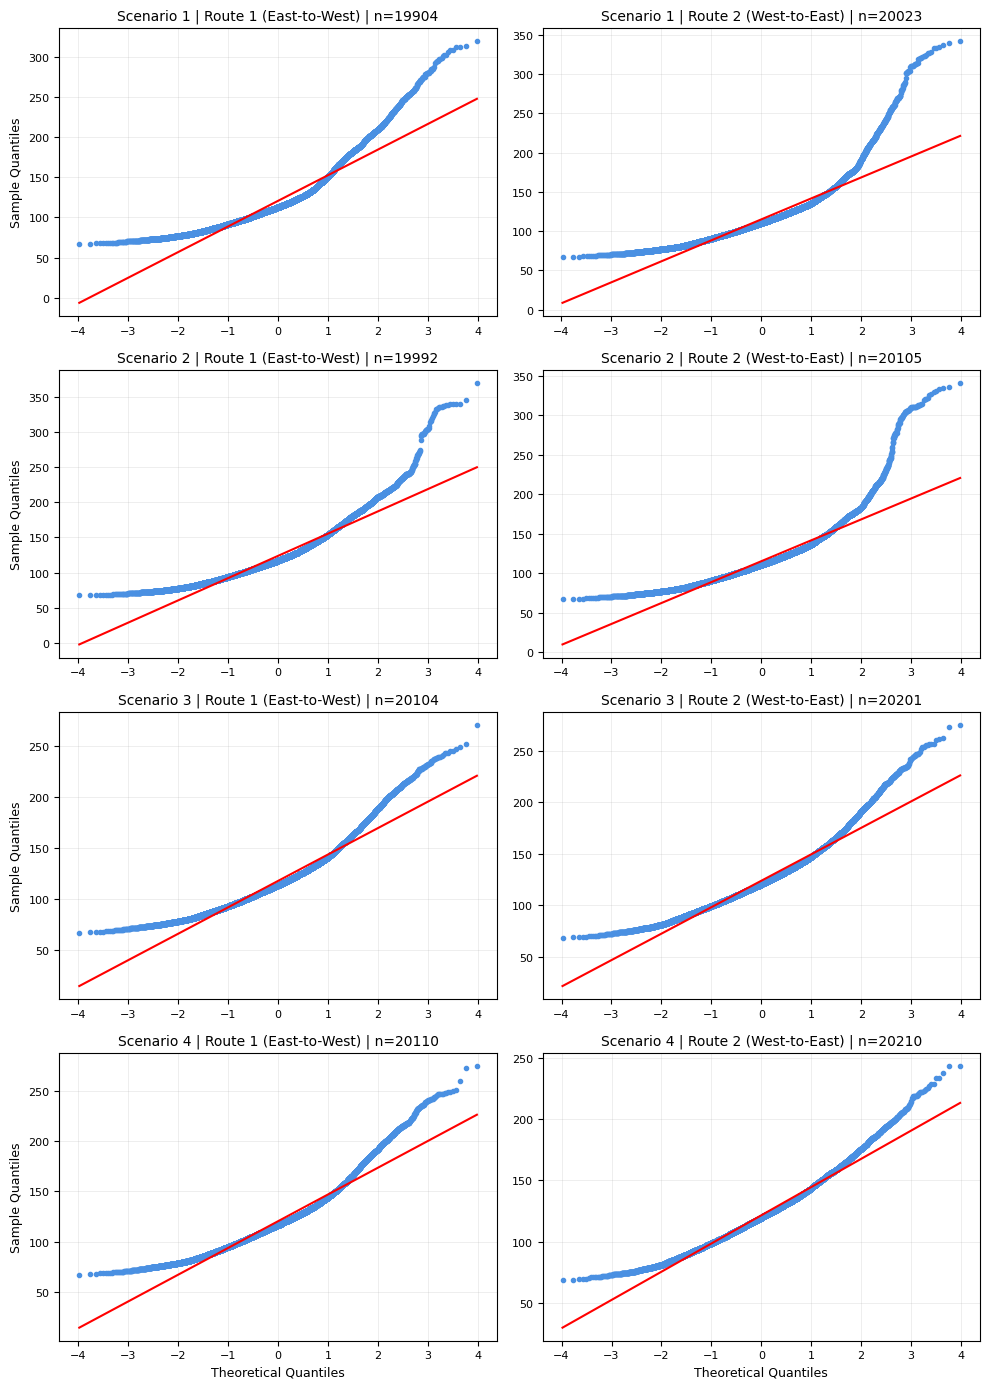

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# NOTE: UPDATE THESE FILE PATHS before running!
scenarios = {
    #1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    #2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    #3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    #4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Create one large figure with all scenarios (4 rows × 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 14))

for row, (scenario_num, file_path) in enumerate(scenarios.items()):
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only non-buses (FzTyp != 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    other_vehicles_df = routes_df[routes_df['FzTyp'] != 300]

    for col, route in enumerate(routes):
        # Filter data for this route
        data = other_vehicles_df[other_vehicles_df['Nr.'] == route]['Rsz.']

        #create Q-Q-Plot for normal distribution
        stats.probplot(data, dist="norm", plot=axes[row, col])


        # Customize the plot
        axes[row, col].set_title(
            f'Scenario {scenario_num} | Route {route} ({route_descriptions[route]}) | n={len(data)}',
            fontsize=10
        )

        # Add x-axis label to the bottom row
        if row == 3:
            axes[row, col].set_xlabel('Theoretical Quantiles', fontsize=9)
        else:
            axes[row, col].set_xlabel('')

        # Add y-axis label to the left column
        if col == 0:
            axes[row, col].set_ylabel('Sample Quantiles', fontsize=9)
        else:
            axes[row, col].set_ylabel('')

        axes[row, col].tick_params(labelsize=8)

        # Add grid for better readability
        axes[row, col].grid(True, alpha=0.3, linewidth=0.5)

        # Get the line objects to customize colors
        line = axes[row, col].get_lines()[0]  # Data points
        line.set_markerfacecolor('#4A90E2')
        line.set_markeredgecolor('#4A90E2')
        line.set_markersize(3)

plt.tight_layout()

# Save the figure
#plt.savefig('/Users/viktorsuter/Desktop/other_vehicles_qq_plots.png', dpi=300, bbox_inches='tight')

plt.show()

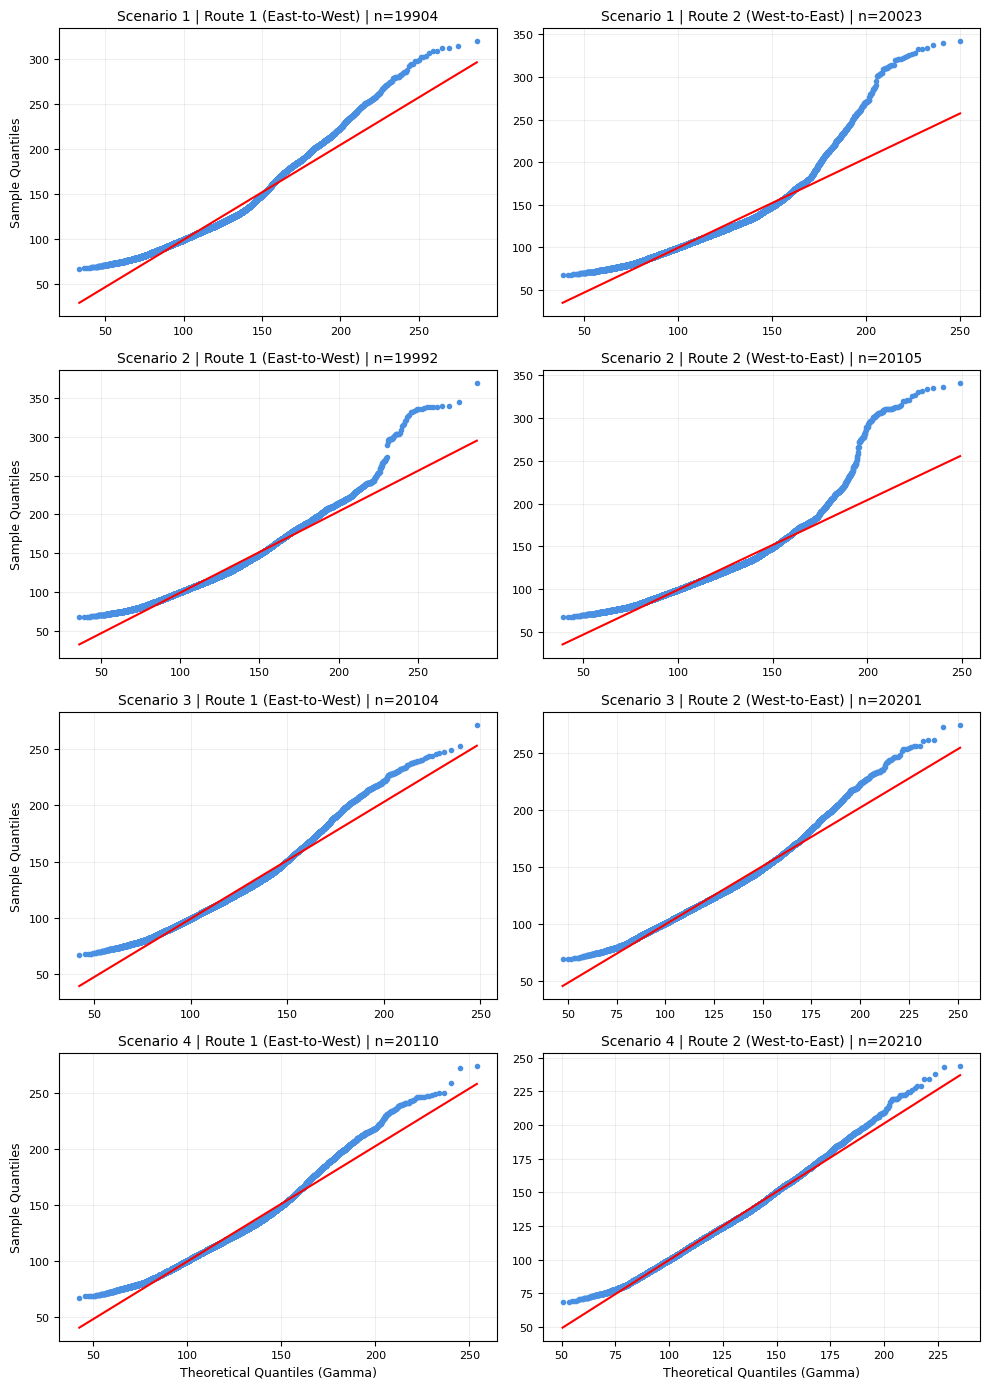

In [26]:
# Create one large figure with all scenarios (4 rows × 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 14))

# NOTE: UPDATE THESE FILE PATHS before running!
scenarios = {
    #1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    #2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    #3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    #4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

for row, (scenario_num, file_path) in enumerate(scenarios.items()):
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only non-buses (FzTyp != 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    other_vehicles_df = routes_df[routes_df['FzTyp'] != 300]

    for col, route in enumerate(routes):
        # Filter data for this route
        data = other_vehicles_df[other_vehicles_df['Nr.'] == route]['Rsz.']

        # Create Q-Q plot for gamma distribution
        # Estimate parameters for the gamma distribution
        alpha, loc, beta = stats.gamma.fit(data, floc=0)
        stats.probplot(data, dist=stats.gamma, sparams=(alpha, loc, beta), plot=axes[row, col])


        # Customize the plot
        axes[row, col].set_title(
            f'Scenario {scenario_num} | Route {route} ({route_descriptions[route]}) | n={len(data)}',
            fontsize=10
        )

        # Add x-axis label to the bottom row
        if row == 3:
            axes[row, col].set_xlabel('Theoretical Quantiles (Gamma)', fontsize=9)
        else:
            axes[row, col].set_xlabel('')

        # Add y-axis label to the left column
        if col == 0:
            axes[row, col].set_ylabel('Sample Quantiles', fontsize=9)
        else:
            axes[row, col].set_ylabel('')

        axes[row, col].tick_params(labelsize=8)

        # Add grid for better readability
        axes[row, col].grid(True, alpha=0.3, linewidth=0.5)

        # Get the line objects to customize colors
        line = axes[row, col].get_lines()[0]  # Data points
        line.set_markerfacecolor('#4A90E2')
        line.set_markeredgecolor('#4A90E2')
        line.set_markersize(3)

plt.tight_layout()

In [25]:
import pandas as pd
import scipy.stats as stats

# NOTE: UPDATE THESE FILE PATHS before running!
scenarios = {
    #1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    #2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    #3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    #4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Store results
results = []

print("=" * 80)
print("SHAPIRO-WILK NORMALITY TEST RESULTS - OTHER VEHICLES")
print("=" * 80)
print(f"{'Scenario':<10} {'Route':<15} {'n':<8} {'Statistic':<12} {'p-value':<12} {'Normal?':<10}")
print("-" * 80)

for scenario_num, file_path in scenarios.items():
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only non-buses (FzTyp != 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    other_vehicles_df = routes_df[routes_df['FzTyp'] != 300]

    for route in routes:
        # Filter data for this route
        data = other_vehicles_df[other_vehicles_df['Nr.'] == route]['Rsz.']

        # Run Shapiro-Wilk test
        statistic, p_value = stats.shapiro(data)

        # Determine if normal (using alpha = 0.05)
        is_normal = "Yes" if p_value > 0.05 else "No"

        # Store results
        results.append({
            'Scenario': scenario_num,
            'Route': f'{route} ({route_descriptions[route]})',
            'n': len(data),
            'Statistic': statistic,
            'p-value': p_value,
            'Normal (α=0.05)': is_normal
        })

        # Print results
        print(f"{scenario_num:<10} {route} ({route_descriptions[route]:<12}) {len(data):<8} "
              f"{statistic:<12.6f} {p_value:<12.6e} {is_normal:<10}")

print("=" * 80)

# Create DataFrame for easy viewing and export
results_df = pd.DataFrame(results)

# Display summary
print("\nSUMMARY:")
normal_count = sum(1 for r in results if r['Normal (α=0.05)'] == 'Yes')
total_count = len(results)
print(f"Normal distributions: {normal_count}/{total_count}")
print(f"Non-normal distributions: {total_count - normal_count}/{total_count}")

# Save to CSV
results_df.to_csv('/Users/viktorsuter/Desktop/other_vehicles_normality_tests.csv', index=False)
print("\nResults saved to: other_vehicles_normality_tests.csv")

# Display the dataframe nicely
print("\n" + "=" * 80)
print("RESULTS TABLE:")
print("=" * 80)
print(results_df.to_string(index=False))

SHAPIRO-WILK NORMALITY TEST RESULTS - OTHER VEHICLES
Scenario   Route           n        Statistic    p-value      Normal?   
--------------------------------------------------------------------------------
1          1 (East-to-West) 19904    0.890166     9.515086e-79 No        
1          2 (West-to-East) 20023    0.857245     7.984924e-85 No        
2          1 (East-to-West) 19992    0.917189     1.093937e-72 No        
2          2 (West-to-East) 20105    0.867824     3.798610e-83 No        
3          1 (East-to-West) 20104    0.935626     1.592807e-67 No        
3          2 (West-to-East) 20201    0.950982     3.930774e-62 No        
4          1 (East-to-West) 20110    0.940722     7.602207e-66 No        
4          2 (West-to-East) 20210    0.977901     1.832201e-47 No        

SUMMARY:
Normal distributions: 0/8
Non-normal distributions: 8/8


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19904.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20023.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19992.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20105.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.

OSError: Cannot save file into a non-existent directory: '/Users/viktorsuter/Desktop'

In [28]:
import pandas as pd
import scipy.stats as stats

# NOTE: UPDATE THESE FILE PATHS before running!
scenarios = {
    #1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    #2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    #3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    #4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Store results
results = []

print("=" * 90)
print("KOLMOGOROV-SMIRNOV NORMALITY TEST RESULTS - OTHER VEHICLES")
print("=" * 90)
print(f"{'Scenario':<10} {'Route':<15} {'n':<8} {'Statistic':<12} {'p-value':<12} {'Normal?':<10}")
print("-" * 90)

for scenario_num, file_path in scenarios.items():
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only non-buses (FzTyp != 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    other_vehicles_df = routes_df[routes_df['FzTyp'] != 300]

    for route in routes:
        # Filter data for this route
        data = other_vehicles_df[other_vehicles_df['Nr.'] == route]['Rsz.']

        # Standardize the data (required for KS test with normal distribution)
        mean = data.mean()
        std = data.std()
        standardized_data = (data - mean) / std

        # Run Kolmogorov-Smirnov test against standard normal distribution
        statistic, p_value = stats.kstest(standardized_data, 'norm')

        # Determine if normal (using alpha = 0.05)
        is_normal = "Yes" if p_value > 0.05 else "No"

        # Store results
        results.append({
            'Scenario': scenario_num,
            'Route': f'{route} ({route_descriptions[route]})',
            'n': len(data),
            'Statistic': statistic,
            'p-value': p_value,
            'Normal (α=0.05)': is_normal
        })

        # Print results
        print(f"{scenario_num:<10} {route} ({route_descriptions[route]:<12}) {len(data):<8} "
              f"{statistic:<12.6f} {p_value:<12.6e} {is_normal:<10}")

print("=" * 90)

# Create DataFrame for easy viewing and export
results_df = pd.DataFrame(results)

# Display summary
print("\nSUMMARY:")
normal_count = sum(1 for r in results if r['Normal (α=0.05)'] == 'Yes')
total_count = len(results)
print(f"Normal distributions: {normal_count}/{total_count}")
print(f"Non-normal distributions: {total_count - normal_count}/{total_count}")

# Save to CSV
#results_df.to_csv('/Users/viktorsuter/Desktop/other_vehicles_normality_tests_KS.csv', index=False)
#print("\nResults saved to: other_vehicles_normality_tests_KS.csv")

# Display the dataframe nicely
print("\n" + "=" * 90)
print("RESULTS TABLE:")
print("=" * 90)
print(results_df.to_string(index=False))

KOLMOGOROV-SMIRNOV NORMALITY TEST RESULTS - OTHER VEHICLES
Scenario   Route           n        Statistic    p-value      Normal?   
------------------------------------------------------------------------------------------
1          1 (East-to-West) 19904    0.125361     4.137645e-273 No        
1          2 (West-to-East) 20023    0.097862     2.274921e-167 No        
2          1 (East-to-West) 19992    0.096800     1.659473e-163 No        
2          2 (West-to-East) 20105    0.092667     1.072715e-150 No        
3          1 (East-to-West) 20104    0.075179     2.898900e-99 No        
3          2 (West-to-East) 20201    0.065106     6.890107e-75 No        
4          1 (East-to-West) 20110    0.075950     2.459600e-101 No        
4          2 (West-to-East) 20210    0.042014     1.954588e-31 No        

SUMMARY:
Normal distributions: 0/8
Non-normal distributions: 8/8

RESULTS TABLE:
 Scenario            Route     n  Statistic       p-value Normal (α=0.05)
        1 1 (East-to-Wes

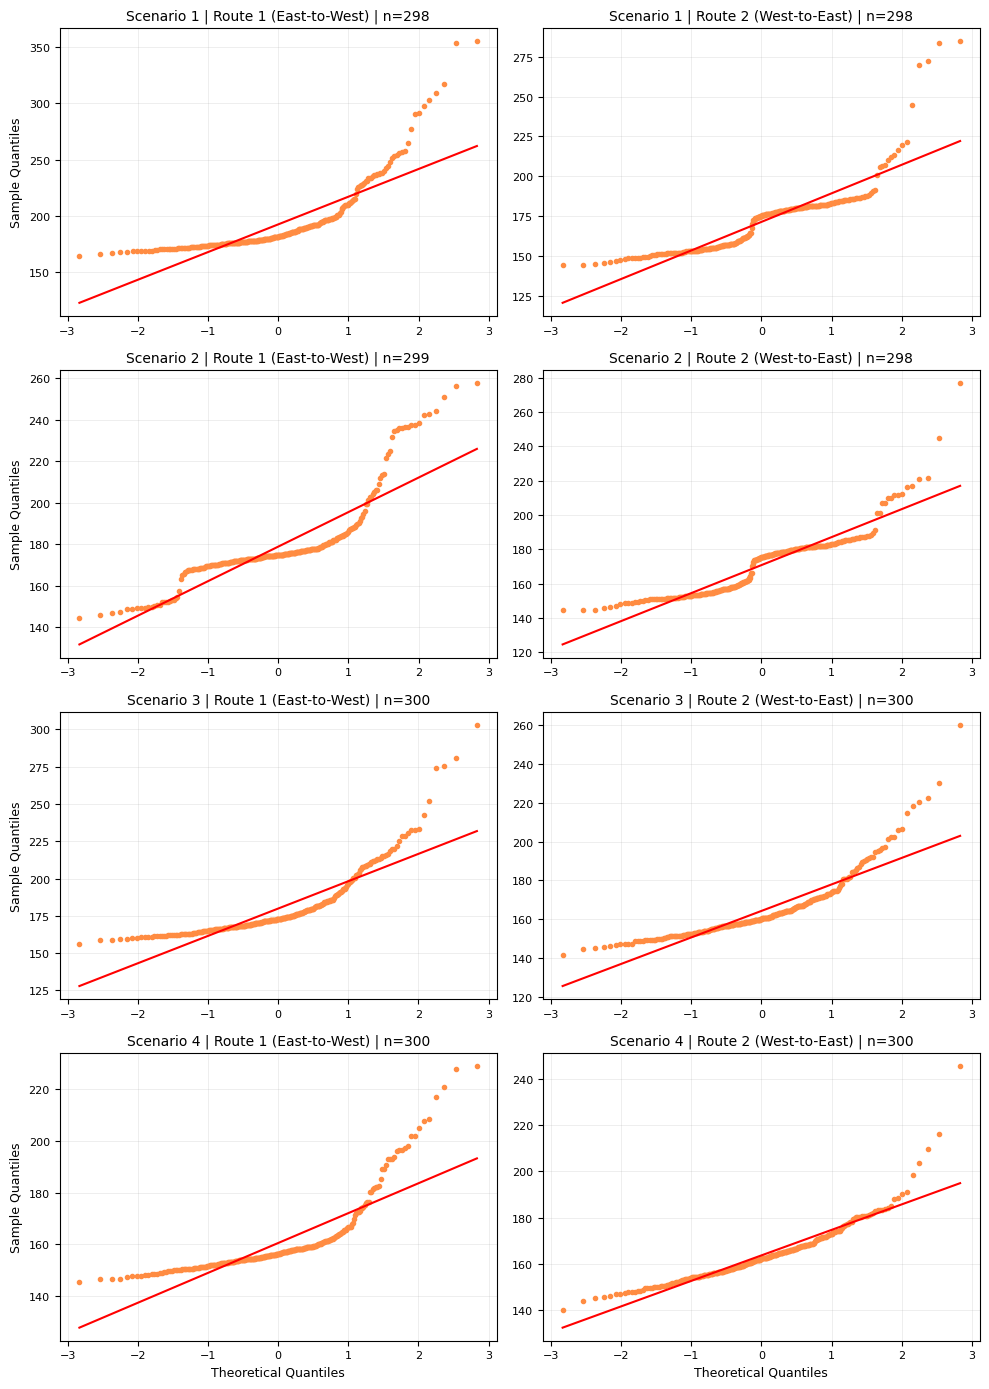

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# NOTE: UPDATE THESE FILE PATHS before running!
scenarios = {
    #1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    #2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    #3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    #4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Create one large figure with all scenarios (4 rows × 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 14))

for row, (scenario_num, file_path) in enumerate(scenarios.items()):
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only buses (FzTyp == 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    buses_df = routes_df[routes_df['FzTyp'] == 300]

    for col, route in enumerate(routes):
        # Filter data for this route
        data = buses_df[buses_df['Nr.'] == route]['Rsz.']

        # Create Q-Q plot
        stats.probplot(data, dist="norm", plot=axes[row, col])

        # Customize the plot
        axes[row, col].set_title(
            f'Scenario {scenario_num} | Route {route} ({route_descriptions[route]}) | n={len(data)}',
            fontsize=10
        )

        # Only add x-axis label to the bottom row
        if row == 3:
            axes[row, col].set_xlabel('Theoretical Quantiles', fontsize=9)
        else:
            axes[row, col].set_xlabel('')

        # Only add y-axis label to the left column
        if col == 0:
            axes[row, col].set_ylabel('Sample Quantiles', fontsize=9)
        else:
            axes[row, col].set_ylabel('')

        axes[row, col].tick_params(labelsize=8)

        # Add grid for better readability
        axes[row, col].grid(True, alpha=0.3, linewidth=0.5)

        # Customize marker colors to match bus theme (orange)
        line = axes[row, col].get_lines()[0]  # Data points
        line.set_markerfacecolor('#FF8C42')
        line.set_markeredgecolor('#FF8C42')
        line.set_markersize(3)

plt.tight_layout()

# Save the figure
#plt.savefig('/Users/viktorsuter/Desktop/buses_qq_plots.png', dpi=300, bbox_inches='tight')

plt.show()

In [31]:
import pandas as pd
import scipy.stats as stats

# NOTE: UPDATE THESE FILE PATHS before running!
scenarios = {
    #1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    #2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    #3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    #4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
    1: '/content/drive/My Drive/CAS_M2/Scenarios/S000001/S000001_all_runs.csv',
    2: '/content/drive/My Drive/CAS_M2/Scenarios/S000002/S000002_all_runs.csv',
    3: '/content/drive/My Drive/CAS_M2/Scenarios/S000003/S000003_all_runs.csv',
    4: '/content/drive/My Drive/CAS_M2/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Store results
results = []

print("=" * 80)
print("SHAPIRO-WILK NORMALITY TEST RESULTS - BUSES")
print("=" * 80)
print(f"{'Scenario':<10} {'Route':<15} {'n':<8} {'Statistic':<12} {'p-value':<12} {'Normal?':<10}")
print("-" * 80)

for scenario_num, file_path in scenarios.items():
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only buses (FzTyp == 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    buses_df = routes_df[routes_df['FzTyp'] == 300]

    for route in routes:
        # Filter data for this route
        data = buses_df[buses_df['Nr.'] == route]['Rsz.']

        # Run Shapiro-Wilk test
        statistic, p_value = stats.shapiro(data)

        # Determine if normal (using alpha = 0.05)
        is_normal = "Yes" if p_value > 0.05 else "No"

        # Store results
        results.append({
            'Scenario': scenario_num,
            'Route': f'{route} ({route_descriptions[route]})',
            'n': len(data),
            'Statistic': statistic,
            'p-value': p_value,
            'Normal (α=0.05)': is_normal
        })

        # Print results
        print(f"{scenario_num:<10} {route} ({route_descriptions[route]:<12}) {len(data):<8} "
              f"{statistic:<12.6f} {p_value:<12.6e} {is_normal:<10}")

print("=" * 80)

# Create DataFrame for easy viewing and export
results_df = pd.DataFrame(results)

# Display summary
print("\nSUMMARY:")
normal_count = sum(1 for r in results if r['Normal (α=0.05)'] == 'Yes')
total_count = len(results)
print(f"Normal distributions: {normal_count}/{total_count}")
print(f"Non-normal distributions: {total_count - normal_count}/{total_count}")

# Save to CSV
#results_df.to_csv('/Users/viktorsuter/Desktop/buses_normality_tests.csv', index=False)
#print("\nResults saved to: buses_normality_tests.csv")

# Display the dataframe nicely
print("\n" + "=" * 80)
print("RESULTS TABLE:")
print("=" * 80)
print(results_df.to_string(index=False))

SHAPIRO-WILK NORMALITY TEST RESULTS - BUSES
Scenario   Route           n        Statistic    p-value      Normal?   
--------------------------------------------------------------------------------
1          1 (East-to-West) 298      0.695791     7.220364e-23 No        
1          2 (West-to-East) 298      0.789393     2.507357e-19 No        
2          1 (East-to-West) 299      0.758243     1.186377e-20 No        
2          2 (West-to-East) 298      0.868577     2.967018e-15 No        
3          1 (East-to-West) 300      0.753318     7.032441e-21 No        
3          2 (West-to-East) 300      0.807055     1.353138e-18 No        
4          1 (East-to-West) 300      0.699973     8.407617e-23 No        
4          2 (West-to-East) 300      0.877854     1.005284e-14 No        

SUMMARY:
Normal distributions: 0/8
Non-normal distributions: 8/8

RESULTS TABLE:
 Scenario            Route   n  Statistic      p-value Normal (α=0.05)
        1 1 (East-to-West) 298   0.695791 7.220364e-23   

# Task
Analysieren Sie die Daten, um festzustellen, ob es signifikante Unterschiede in den 'Rsz.'-Werten zwischen den 4 Szenarien gibt, und identifizieren Sie, welches Szenario signifikant am besten abschneidet. Führen Sie dazu einen Kruskal-Wallis-Test gefolgt von einem Post-hoc Dunn's Test durch.

## Daten laden und vorbereiten

### Subtask:
Laden Sie die Daten für alle 4 Szenarien aus den angegebenen CSV-Dateien. Filtern Sie die Datenanschließend für die relevanten Fahrzeugtypen (Nicht-Busse) und Routen (1 und 2).


**Reasoning**:
Load and filter the data for each scenario and route as specified in the instructions.



In [69]:
filtered_data = {}

for scenario_num, file_path in scenarios.items():
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only buses (FzTyp == 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    buses_df = routes_df[routes_df['FzTyp'] == 300].copy() # Added .copy() to avoid SettingWithCopyWarning

    # Store the filtered data for each route
    filtered_data[scenario_num] = {}
    for route in routes:
        filtered_data[scenario_num][route] = buses_df[buses_df['Nr.'] == route]['Rsz.'].copy() # Added .copy()

# Display the first few values for one of the filtered series to verify
print("First few 'Rsz.' values for Buses in Scenario 1, Route 1:")
print(filtered_data[1][1].head())

First few 'Rsz.' values for Buses in Scenario 1, Route 1:
162    186.0
358    186.3
521    175.5
736    167.1
917    200.8
Name: Rsz., dtype: float64


## Daten für den test strukturieren

### Subtask:
Bereiten Sie die Daten so auf, dass sie für den Kruskal-Wallis-Test geeignet sind. Gruppieren Sie die 'Rsz.'-Werte nach Szenario für jede Route separat.


**Reasoning**:
Iterate through the routes and scenarios to create the list of lists for the Kruskal-Wallis test, storing the results for each route separately.



In [70]:
data_for_kruskal_wallis = {}

for route in routes:
    scenario_data_for_route = [filtered_data[scenario_num][route].dropna().tolist() for scenario_num in scenarios.keys()]
    data_for_kruskal_wallis[route] = scenario_data_for_route

# Print the number of samples for each scenario and route to verify
for route, data_list in data_for_kruskal_wallis.items():
    print(f"Route {route} ({route_descriptions[route]}):")
    for i, data in enumerate(data_list):
        print(f"  Scenario {i+1}: n={len(data)}")

Route 1 (East-to-West):
  Scenario 1: n=298
  Scenario 2: n=299
  Scenario 3: n=300
  Scenario 4: n=300
Route 2 (West-to-East):
  Scenario 1: n=298
  Scenario 2: n=298
  Scenario 3: n=300
  Scenario 4: n=300


## Kruskal-wallis h-test durchführen

### Subtask:
Führen Sie den Kruskal-Wallis H-Test für jede Route (Ost-West und West-Ost) separat durch, um festzustellen, ob es signifikante Unterschiede in den 'Rsz.'-Werten über die 4 Szenarien hinweg gibt.


**Reasoning**:
Iterate through the routes and perform the Kruskal-Wallis test for each route using the prepared data, then print the results.



In [71]:
kruskal_results = {}

for route in routes:
    # Get the data for the current route across all scenarios
    data_list = data_for_kruskal_wallis[route]

    # Perform the Kruskal-Wallis H-test
    # Use *data_list to unpack the list of arrays/lists into separate arguments for kruskal
    statistic, p_value = stats.kruskal(*data_list)

    # Store the results
    kruskal_results[route] = {'statistic': statistic, 'p_value': p_value}

    # Print the results for the current route
    print(f"\nKruskal-Wallis H-Test Results for Route {route} ({route_descriptions[route]}):")
    print(f"  H-Statistic: {statistic:.6f}")
    print(f"  P-value: {p_value:.6e}")

    # Determine if the difference is significant (using alpha = 0.05)
    if p_value < 0.05:
        print("  Conclusion: There are significant differences in 'Rsz.' values across the 4 scenarios.")
    else:
        print("  Conclusion: There are no significant differences in 'Rsz.' values across the 4 scenarios.")


Kruskal-Wallis H-Test Results for Route 1 (East-to-West):
  H-Statistic: 462.308252
  P-value: 7.020709e-100
  Conclusion: There are significant differences in 'Rsz.' values across the 4 scenarios.

Kruskal-Wallis H-Test Results for Route 2 (West-to-East):
  H-Statistic: 45.362517
  P-value: 7.748524e-10
  Conclusion: There are significant differences in 'Rsz.' values across the 4 scenarios.


## Ergebnisse des kruskal-wallis-tests interpretieren

### Subtask:
Analysieren Sie den p-Wert des Kruskal-Wallis-Tests. Wenn der p-Wert kleiner als Ihr Signifikanzniveau (z. B. 0.05) ist, gibt es signifikante Unterschiede zwischen mindestens zwei Szenarien.


**Reasoning**:
Access the p-values from the kruskal_results dictionary and compare them to the significance level to interpret the results for each route and summarize the findings.



In [72]:
alpha = 0.05

print("\nInterpretation of Kruskal-Wallis Test p-values:")
print("-" * 50)

for route, results in kruskal_results.items():
    p_value = results['p_value']
    route_desc = route_descriptions[route]

    print(f"Route {route} ({route_desc}):")
    print(f"  P-value: {p_value:.6e}")

    if p_value < alpha:
        print(f"  Since the p-value ({p_value:.6e}) is less than alpha ({alpha}), we reject the null hypothesis.")
        print(f"  Conclusion: There are statistically significant differences in 'Rsz.' values across the four scenarios for Route {route_desc}.")
    else:
        print(f"  Since the p-value ({p_value:.6e}) is greater than or equal to alpha ({alpha}), we fail to reject the null hypothesis.")
        print(f"  Conclusion: There are no statistically significant differences in 'Rsz.' values across the four scenarios for Route {route_desc}.")
    print("-" * 50)

print("\nSummary:")
# Check if any Kruskal-Wallis test was significant
any_significant = any(result['p_value'] < alpha for result in kruskal_results.values())

if any_significant:
    print("For at least one route, the Kruskal-Wallis test yielded a p-value significantly less than the significance level of 0.05.")
    print("This indicates that there are statistically significant differences in the 'Rsz.' values among the four scenarios for that route(s).")
    print("Therefore, a post-hoc test (like Dunn's test) is warranted to determine which specific scenario pairs differ significantly.")
else:
    print("For both routes, the Kruskal-Wallis test yielded p-values greater than or equal to the significance level of 0.05.")
    print("This indicates that there are no statistically significant differences in the 'Rsz.' values among the four scenarios for either route.")
    print("Therefore, a post-hoc test is not warranted.")


Interpretation of Kruskal-Wallis Test p-values:
--------------------------------------------------
Route 1 (East-to-West):
  P-value: 7.020709e-100
  Since the p-value (7.020709e-100) is less than alpha (0.05), we reject the null hypothesis.
  Conclusion: There are statistically significant differences in 'Rsz.' values across the four scenarios for Route East-to-West.
--------------------------------------------------
Route 2 (West-to-East):
  P-value: 7.748524e-10
  Since the p-value (7.748524e-10) is less than alpha (0.05), we reject the null hypothesis.
  Conclusion: There are statistically significant differences in 'Rsz.' values across the four scenarios for Route West-to-East.
--------------------------------------------------

Summary:
For at least one route, the Kruskal-Wallis test yielded a p-value significantly less than the significance level of 0.05.
This indicates that there are statistically significant differences in the 'Rsz.' values among the four scenarios for that r

## Post-hoc dunn's test durchführen (falls kruskal-wallis signifikant ist)

### Subtask:
Wenn der Kruskal-Wallis-Test signifikant war, führen Sie einen Post-hoc Dunn's Test durch, um alle paarweisen Vergleiche zwischen den Szenarien durchzuführen (Szenario 1 vs. 2, 1 vs. 3, 1 vs. 4, 2 vs. 3, 2 vs. 4, 3 vs. 4). Wenden Sie eine geeignete Korrektur für multiple Vergleiche an (z. B. Holm-Bonferroni).


**Reasoning**:
Install the necessary library for Dunn's test.



In [73]:
%pip install scikit-posthocs

**Reasoning**:
Perform Dunn's test with Holm-Bonferroni correction for each route where the Kruskal-Wallis test was significant and print the results.



In [74]:
import scikit_posthocs as sp

alpha = 0.05

print("\nPost-hoc Dunn's Test Results (Holm-Bonferroni Correction):")
print("=" * 80)

for route, kruskal_result in kruskal_results.items():
    p_value_kruskal = kruskal_result['p_value']
    route_desc = route_descriptions[route]

    print(f"\nRoute {route} ({route_desc}):")

    if p_value_kruskal < alpha:
        print(f"  Kruskal-Wallis test was significant (p={p_value_kruskal:.6e}). Performing Dunn's test...")

        # Perform Dunn's test with Holm-Bonferroni correction
        dunn_results = sp.posthoc_dunn(data_for_kruskal_wallis[route], p_adjust='holm')

        # Print the results table
        print("\n  Dunn's Test Pairwise Comparisons (Corrected p-values):")
        print(dunn_results.to_string())

    else:
        print(f"  Kruskal-Wallis test was not significant (p={p_value_kruskal:.6e}). No post-hoc test performed.")

print("\n" + "=" * 80)


Post-hoc Dunn's Test Results (Holm-Bonferroni Correction):

Route 1 (East-to-West):
  Kruskal-Wallis test was significant (p=7.020709e-100). Performing Dunn's test...

  Dunn's Test Pairwise Comparisons (Corrected p-values):
              1             2             3             4
1  1.000000e+00  1.458345e-11  1.384009e-13  7.267910e-97
2  1.458345e-11  1.000000e+00  4.930488e-01  1.328986e-44
3  1.384009e-13  4.930488e-01  1.000000e+00  1.216191e-40
4  7.267910e-97  1.328986e-44  1.216191e-40  1.000000e+00

Route 2 (West-to-East):
  Kruskal-Wallis test was significant (p=7.748524e-10). Performing Dunn's test...

  Dunn's Test Pairwise Comparisons (Corrected p-values):
          1         2         3         4
1  1.000000  1.000000  0.000004  0.000021
2  1.000000  1.000000  0.000004  0.000021
3  0.000004  0.000004  1.000000  1.000000
4  0.000021  0.000021  1.000000  1.000000



## Ergebnisse des post-hoc-tests interpretieren und bestes szenario identifizieren

### Subtask:
Analysieren Sie die p-Werte der paarweisen Vergleiche. Betrachten Sie auch die Mediane oder mittleren Ränge der 'Rsz.'-Werte für jedes Szenario. Basierend auf den signifikanten Unterschieden aus dem Post-hoc-Test und den Medianwerten können Sie identifizieren, welches Szenario signifikant die besten 'Rsz.'-Werte aufweist.


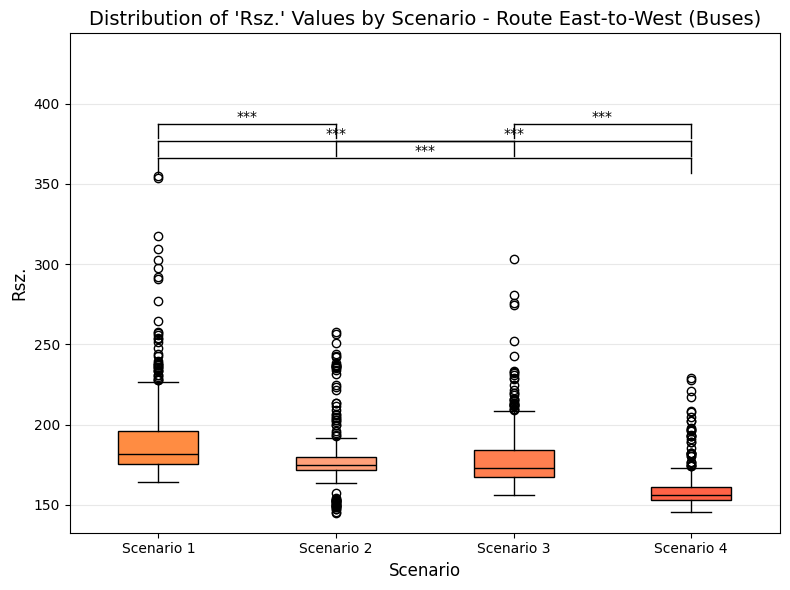

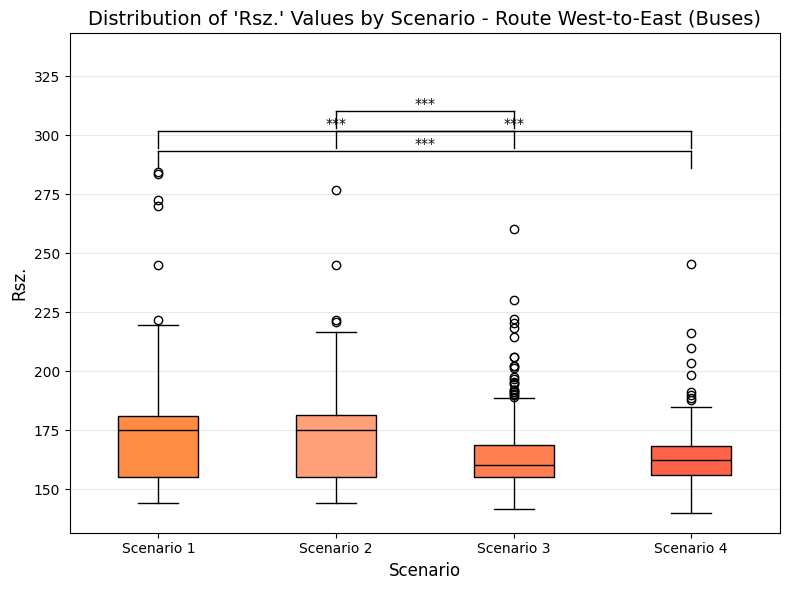


SUMMARY OF STATISTICAL TEST RESULTS AND SCENARIO PERFORMANCE (BUSES)

Route 1 (East-to-West):
Kruskal-Wallis H-Test P-value: 7.020709e-100
Conclusion from Kruskal-Wallis Test: There are statistically significant differences in 'Rsz.' values across the four scenarios.

  Median 'Rsz.' Values per Scenario:
    Scenario 4: 156.30
    Scenario 3: 172.80
    Scenario 2: 174.80
    Scenario 1: 181.40

  Significant Pairwise Differences (Dunn's Test, p < α):
    Scenario 1 vs Scenario 2: p=1.458345e-11
    Scenario 1 vs Scenario 3: p=1.384009e-13
    Scenario 1 vs Scenario 4: p=7.267910e-97
    Scenario 2 vs Scenario 4: p=1.328986e-44
    Scenario 3 vs Scenario 4: p=1.216191e-40

Scenario with the lowest median 'Rsz.' (among those with data): Scenario 4 (156.30)
Conclusion on Best Scenario: Based on the significant Kruskal-Wallis test, significant pairwise differences, and the lowest median 'Rsz.', Scenario 4 performs significantly better than the other scenarios for Route East-to-West.
----

In [78]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scikit_posthocs as sp # Import scikit_posthocs for re-computing dunn_results if needed

alpha = 0.05

# Function to add significance bars/markers to the boxplot (re-defined or ensure it's available)
def add_significance_bars(ax, dunn_results, scenario_nums, medians, data_for_plot, alpha):
    # Assuming scenario_nums corresponds to the order in data_for_plot (1, 2, 3, 4)
    # We need to map scenario numbers (1-4) to boxplot positions (0-3)
    scenario_to_pos = {num: pos for pos, num in enumerate(scenario_nums)}
    pos_to_scenario = {pos: num for pos, num in enumerate(scenario_nums)}

    # Ensure data_for_plot is not empty before calculating y_max
    if not any(data_for_plot):
        return # Exit if no data to plot

    y_max = max([max(d) for d in data_for_plot if len(d) > 0]) # Get max value across all data points for y-axis limit, handle empty lists
    if y_max is None: # Handle case where all data lists are empty
        return

    y_range = y_max  # Use y_max for a simple range
    bar_height = y_range * 0.05  # Adjust height of the significance bar
    bar_gap = y_range * 0.03     # Adjust gap between bars


    # Loop through significant pairs from Dunn's results
    # Dunn's results dataframe is typically indexed by scenario numbers (1-4)
    for i in scenario_nums:
        for j in scenario_nums:
            if i < j: # Consider each pair only once
                try:
                    # Access corrected p-value from the Dunn's results dataframe
                    # Ensure correct indexing based on how sp.posthoc_dunn was called
                    p_value = dunn_results.loc[i, j]

                    if p_value < alpha:
                        # Significant difference found
                        pos1 = scenario_to_pos[i]
                        pos2 = scenario_to_pos[j]

                        # Determine the y-position for the bar
                        # Using a fixed offset from the overall max for simplicity
                        # Adjust y position based on distance between scenarios
                        y_bar = y_max + bar_gap * (len(scenario_nums) - (j - i))

                        # Add the horizontal line
                        ax.plot([pos1 + 1, pos2 + 1], [y_bar, y_bar], color='black', linewidth=1)

                        # Add the vertical lines connecting bar to box
                        # Ensure bar doesn't go below the max data point of the involved boxes
                        max_box_edge = max([np.percentile(data_for_plot[pos1], 75) if len(data_for_plot[pos1]) > 0 else -np.inf,
                                            np.percentile(data_for_plot[pos2], 75) if len(data_for_plot[pos2]) > 0 else -np.inf])
                        y_start = max(y_bar - bar_height/2, max_box_edge + bar_gap/2) # Ensure start is above box edge

                        ax.plot([pos1 + 1, pos1 + 1], [y_start, y_bar], color='black', linewidth=1)
                        ax.plot([pos2 + 1, pos2 + 1], [y_start, y_bar], color='black', linewidth=1)


                        # Add significance asterisks
                        # Use different markers for different levels of significance (optional)
                        if p_value < 0.001:
                            sig_marker = '***'
                        elif p_value < 0.01:
                            sig_marker = '**'
                        else:
                            sig_marker = '*'

                        ax.text((pos1 + pos2) / 2 + 1, y_bar, sig_marker, ha='center', va='bottom', color='black', fontsize=10)

                except KeyError:
                    # This pair might not be in the results if only significant pairs were returned or index is off
                    pass # Silently skip if pair is not in results
                except IndexError:
                     # Handle cases where data_for_plot might be empty for a scenario
                     pass


# Create boxplots for each route
for route in routes:
    route_desc = route_descriptions[route]

    # Get the data for the current route across all scenarios
    # data_for_kruskal_wallis is a list of lists, where each inner list is a scenario
    data_for_plot = data_for_kruskal_wallis[route] # This is the list of data arrays for scenarios 1, 2, 3, 4 in order

    # Calculate medians for each scenario for the current route (needed for analysis summary)
    medians = {}
    scenario_nums_list = list(scenarios.keys()) # Get scenario numbers (1, 2, 3, 4)
    for i, scenario_num in enumerate(scenario_nums_list):
        # Use the data from data_for_plot, which is already filtered and ready
        if len(data_for_plot[i]) > 0: # Check if there is data for this scenario
             medians[scenario_num] = np.median(data_for_plot[i])
        else:
             medians[scenario_num] = np.nan # Use NaN if no data


    # Create the boxplot
    fig, ax = plt.subplots(figsize=(8, 6)) # Adjust figure size as needed
    # Ensure data_for_plot does not contain empty lists for boxplot
    boxplot_data = [data for data in data_for_plot if len(data) > 0]
    boxplot_labels = [f'Scenario {scenario_nums_list[i]}' for i, data in enumerate(data_for_plot) if len(data) > 0]


    if boxplot_data: # Only create boxplot if there is data
        boxplot = ax.boxplot(boxplot_data, patch_artist=True, medianprops={'color': 'black'})

        # Customize boxplot colors (optional)
        # Using orange colors for buses
        colors = ['#FF8C42', '#FFA07A', '#FF7F50', '#FF6347'][:len(boxplot_data)] # Use enough colors for the boxes plotted
        for patch, color in zip(boxplot['boxes'], colors):
            patch.set_facecolor(color)

        # Set labels and title
        ax.set_xticks(np.arange(1, len(boxplot_labels) + 1))
        ax.set_xticklabels(boxplot_labels)
        ax.set_xlabel("Scenario", fontsize=12)
        ax.set_ylabel("Rsz.", fontsize=12)
        ax.set_title(f"Distribution of 'Rsz.' Values by Scenario - Route {route_desc} (Buses)", fontsize=14) # Added " (Buses)" to the title

        # Add grid
        ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

        # Get the Dunn's test results for the current route (assuming it was computed and is available)
        # Need to ensure dunn_results dataframe from the previous step is accessible
        # Re-computing Dunn's test here for certainty, though ideally it would be stored.
        # Only compute if Kruskal-Wallis was significant
        dunn_results_route = None
        if kruskal_results[route]['p_value'] < alpha:
             # Ensure there is data for at least two scenarios before computing Dunn's
             if sum(1 for data in data_for_kruskal_wallis[route] if len(data) > 0) >= 2:
                 dunn_results_route = sp.posthoc_dunn(data_for_kruskal_wallis[route], p_adjust='holm')
             else:
                 print("    Not enough scenarios with data to perform pairwise comparisons.")


        # Add significance bars if Kruskal-Wallis was significant AND Dunn's results are available
        if dunn_results_route is not None:
            # Need to pass the original scenario numbers list (1, 2, 3, 4) to add_significance_bars
            add_significance_bars(ax, dunn_results_route, scenario_nums_list, medians, data_for_plot, alpha)

            # Adjust y-axis limits to accommodate significance bars
            current_ylim = ax.get_ylim()
            # Estimate required space based on number of significant pairs (a bit heuristic)
            # Ensure dunn_results_route is not empty
            if not dunn_results_route.empty:
                num_significant = (dunn_results_route < alpha).sum().sum() / 2
                if num_significant > 0:
                    y_max_data = max([max(d) for d in data_for_plot if len(d) > 0], default=current_ylim[1])
                    y_range_data = y_max_data - current_ylim[0]
                    extra_space = num_significant * (y_range_data * 0.05 + y_range_data * 0.03) * 0.5
                    ax.set_ylim(current_ylim[0], current_ylim[1] + extra_space)


        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for boxplot for Route {route_desc}.")
        plt.close(fig) # Close the empty figure

# --- Summary Section ---
print("\n" + "=" * 80)
print("SUMMARY OF STATISTICAL TEST RESULTS AND SCENARIO PERFORMANCE (BUSES)")
print("=" * 80)

for route in routes:
    route_desc = route_descriptions[route]
    kruskal_result = kruskal_results[route]
    p_value_kruskal = kruskal_result['p_value']

    print(f"\nRoute {route} ({route_desc}):")
    print(f"Kruskal-Wallis H-Test P-value: {p_value_kruskal:.6e}")

    if p_value_kruskal < alpha:
        print("Conclusion from Kruskal-Wallis Test: There are statistically significant differences in 'Rsz.' values across the four scenarios.")

        # Recalculate medians for the summary
        data_for_plot = data_for_kruskal_wallis[route]
        medians = {}
        scenario_nums_list = list(scenarios.keys())
        for i, scenario_num in enumerate(scenario_nums_list):
             if len(data_for_plot[i]) > 0:
                 medians[scenario_num] = np.median(data_for_plot[i])
             else:
                 medians[scenario_num] = np.nan # Use NaN if no data

        print("\n  Median 'Rsz.' Values per Scenario:")
        # Sort medians for clearer presentation, handling NaNs
        sorted_medians = sorted([(s, m) for s, m in medians.items() if not np.isnan(m)], key=lambda item: item[1])
        for scenario_num, median_value in sorted_medians:
            print(f"    Scenario {scenario_num}: {median_value:.2f}")
        # Print scenarios with no data
        for scenario_num, median_value in medians.items():
            if np.isnan(median_value):
                 print(f"    Scenario {scenario_num}: No data")


        print("\n  Significant Pairwise Differences (Dunn's Test, p < α):")
        # Re-compute Dunn's test results for the summary if not stored globally
        # Only compute if Kruskal-Wallis was significant
        dunn_results_route = None
        if kruskal_results[route]['p_value'] < alpha:
             # Ensure there is data for at least two scenarios before computing Dunn's
             if sum(1 for data in data_for_kruskal_wallis[route] if len(data) > 0) >= 2:
                 dunn_results_route = sp.posthoc_dunn(data_for_kruskal_wallis[route], p_adjust='holm')
             else:
                 print("    Not enough scenarios with data to perform pairwise comparisons.")


        significant_pairs_summary = []
        if dunn_results_route is not None and not dunn_results_route.empty:
            for i in scenario_nums_list:
                for j in scenario_nums_list:
                    if i < j:
                        try:
                            p_value_dunn = dunn_results_route.loc[i, j]
                            if p_value_dunn < alpha:
                                significant_pairs_summary.append((i, j, p_value_dunn))
                        except KeyError:
                            pass # Pair not in results


        if significant_pairs_summary:
            for i, j, p_value_dunn in significant_pairs_summary:
                 print(f"    Scenario {i} vs Scenario {j}: p={p_value_dunn:.6e}")
        else:
            print("    No significant pairwise differences found at alpha=0.05.")

        # Identify the scenario with the lowest median among those with data
        scenarios_with_data = {s: medians[s] for s in scenario_nums_list if not np.isnan(medians.get(s))}
        if scenarios_with_data:
            # Get the actual median values for scenarios with data
            medians_with_data_values = {s: medians[s] for s in scenarios_with_data}
            best_scenario_summary = min(medians_with_data_values, key=medians_with_data_values.get)
            best_median = medians_with_data_values[best_scenario_summary]

            # Assess if the best scenario is significantly better than all others with higher medians and data
            is_significantly_best_overall = True
            scenarios_with_higher_medians_and_data = [s for s, m in medians_with_data_values.items() if m > best_median]

            if scenarios_with_higher_medians_and_data and dunn_results_route is not None and not dunn_results_route.empty:
                for other_scenario in scenarios_with_higher_medians_and_data:
                     try:
                         p_value_diff = dunn_results_route.loc[min(best_scenario_summary, other_scenario), max(best_scenario_summary, other_scenario)]
                         if p_value_diff >= alpha:
                             is_significantly_best_overall = False
                             # print(f"    Note: Scenario {best_scenario_summary} is NOT significantly different from Scenario {other_scenario} (p={p_value_diff:.6e}).") # Optional detail
                     except KeyError:
                          is_significantly_best_overall = False # Cannot confirm significant difference if test data is missing
            elif scenarios_with_higher_medians_and_data and (dunn_results_route is None or dunn_results_route.empty):
                 is_significantly_best_overall = False # Cannot confirm significant differences if Dunn's test wasn't run or was empty


            print(f"\nScenario with the lowest median 'Rsz.' (among those with data): Scenario {best_scenario_summary} ({best_median:.2f})")

            if is_significantly_best_overall and scenarios_with_higher_medians_and_data:
                print(f"Conclusion on Best Scenario: Based on the significant Kruskal-Wallis test, significant pairwise differences, and the lowest median 'Rsz.', Scenario {best_scenario_summary} performs significantly better than the other scenarios for Route {route_desc}.")
            elif not scenarios_with_higher_medians_and_data:
                 print(f"Conclusion on Best Scenario: Scenario {best_scenario_summary} has the lowest median among scenarios with data, and there were no other scenarios with higher medians and data to compare against for significant differences.")
            else:
                print(f"Conclusion on Best Scenario: Scenario {best_scenario_summary} has the lowest median 'Rsz.' among scenarios with data, but it is NOT statistically proven to be significantly better than ALL other scenarios with higher medians and data for Route {route_desc} based on the post-hoc Dunn's test results.")
        else:
            print("\nNo scenarios with data to identify the best scenario.")


    else:
        print("Conclusion from Kruskal-Wallis Test: There are no statistically significant differences in 'Rsz.' values across the four scenarios. No specific scenario can be identified as significantly better based on these tests.")

    print("-" * 80)


Calculated Medians for Other Vehicles - Route East-to-West:
  Scenario 1: 112.70
  Scenario 2: 117.00
  Scenario 3: 113.80
  Scenario 4: 116.30


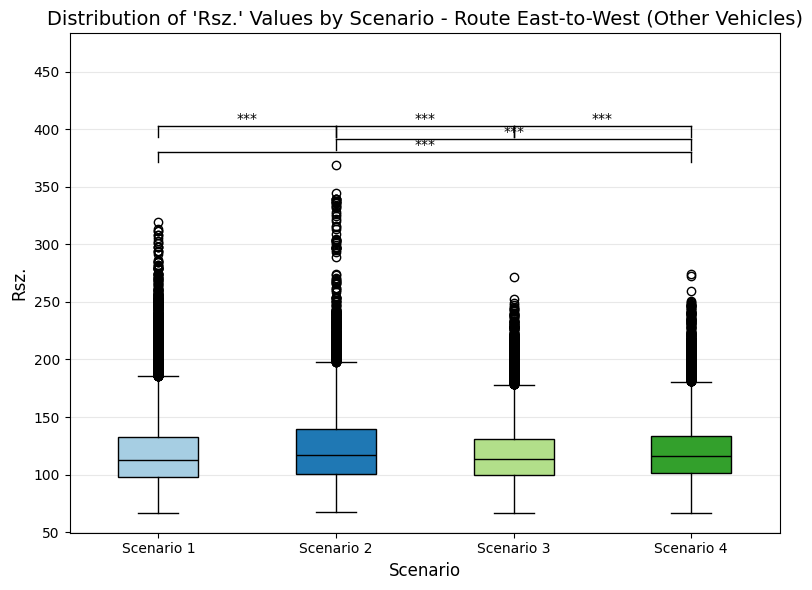


Calculated Medians for Other Vehicles - Route West-to-East:
  Scenario 1: 110.50
  Scenario 2: 110.70
  Scenario 3: 120.50
  Scenario 4: 119.50


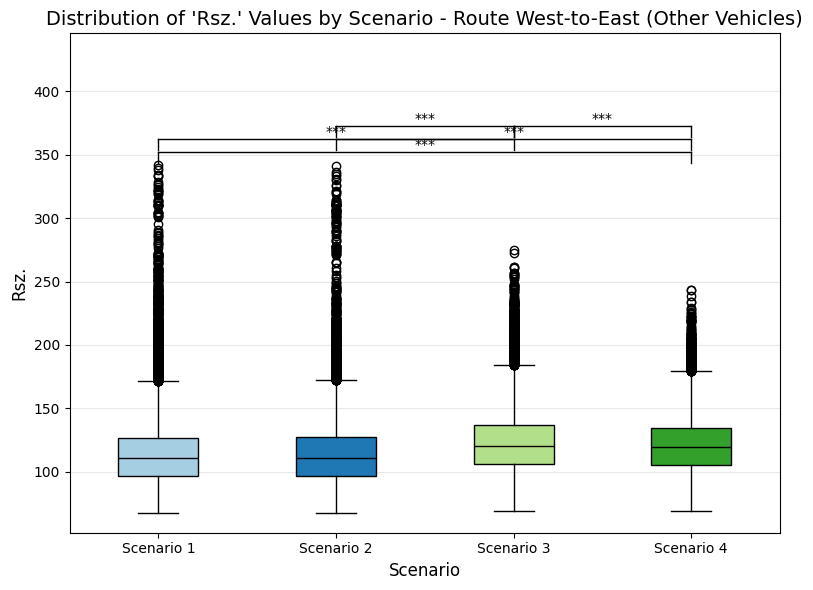


BOXPLOTS FOR OTHER VEHICLES GENERATED


In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scikit_posthocs as sp # Import scikit_posthocs for re-computing dunn_results if needed
import pandas as pd # Import pandas to ensure access to filtered_data

alpha = 0.05

# Re-define the function to add significance bars/markers to the boxplot if it's not globally available
def add_significance_bars(ax, dunn_results, scenario_nums, medians, data_for_plot, alpha):
    # Assuming scenario_nums corresponds to the order in data_for_plot (1, 2, 3, 4)
    # We need to map scenario numbers (1-4) to boxplot positions (0-3)
    scenario_to_pos = {num: pos for pos, num in enumerate(scenario_nums)}
    pos_to_scenario = {pos: num for pos, num in enumerate(scenario_nums)}

    # Ensure data_for_plot is not empty before calculating y_max
    if not any(data_for_plot):
        return # Exit if no data to plot

    y_max = max([max(d) for d in data_for_plot if len(d) > 0]) # Get max value across all data points for y-axis limit, handle empty lists
    if y_max is None: # Handle case where all data lists are empty
        return

    y_range = y_max  # Use y_max for a simple range
    bar_height = y_range * 0.05  # Adjust height of the significance bar
    bar_gap = y_range * 0.03     # Adjust gap between bars


    # Loop through significant pairs from Dunn's results
    # Dunn's results dataframe is typically indexed by scenario numbers (1-4)
    for i in scenario_nums:
        for j in scenario_nums:
            if i < j: # Consider each pair only once
                try:
                    # Access corrected p-value from the Dunn's results dataframe
                    # Ensure correct indexing based on how sp.posthoc_dunn was called
                    p_value = dunn_results.loc[i, j]

                    if p_value < alpha:
                        # Significant difference found
                        pos1 = scenario_to_pos[i]
                        pos2 = scenario_to_pos[j]

                        # Determine the y-position for the bar
                        # Using a fixed offset from the overall max for simplicity
                        # Adjust y position based on distance between scenarios
                        y_bar = y_max + bar_gap * (len(scenario_nums) - (j - i))

                        # Add the horizontal line
                        ax.plot([pos1 + 1, pos2 + 1], [y_bar, y_bar], color='black', linewidth=1)

                        # Add the vertical lines connecting bar to box
                        # Ensure bar doesn't go below the max data point of the involved boxes
                        max_box_edge = max([np.percentile(data_for_plot[pos1], 75) if len(data_for_plot[pos1]) > 0 else -np.inf,
                                            np.percentile(data_for_plot[pos2], 75) if len(data_for_plot[pos2]) > 0 else -np.inf])
                        y_start = max(y_bar - bar_height/2, max_box_edge + bar_gap/2) # Ensure start is above box edge

                        ax.plot([pos1 + 1, pos1 + 1], [y_start, y_bar], color='black', linewidth=1)
                        ax.plot([pos2 + 1, pos2 + 1], [y_start, y_bar], color='black', linewidth=1)


                        # Add significance asterisks
                        # Use different markers for different levels of significance (optional)
                        if p_value < 0.001:
                            sig_marker = '***'
                        elif p_value < 0.01:
                            sig_marker = '**'
                        else:
                            sig_marker = '*'

                        ax.text((pos1 + pos2) / 2 + 1, y_bar, sig_marker, ha='center', va='bottom', color='black', fontsize=10)

                except KeyError:
                    # This pair might not be in the results if only significant pairs were returned or index is off
                    pass # Silently skip if pair is not in results
                except IndexError:
                     # Handle cases where data_for_plot might be empty for a scenario
                     pass

# Re-load and filter data for Other Vehicles (FzTyp != 300)
# Need to re-read data or ensure filtered_data for other vehicles is accessible
# For simplicity and to ensure correct data, let's re-read and filter here.
filtered_data_other_vehicles = {}

for scenario_num, file_path in scenarios.items():
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only non-buses (FzTyp != 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    other_vehicles_df = routes_df[routes_df['FzTyp'] != 300].copy()

    # Store the filtered data for each route
    filtered_data_other_vehicles[scenario_num] = {}
    for route in routes:
        filtered_data_other_vehicles[scenario_num][route] = other_vehicles_df[other_vehicles_df['Nr.'] == route]['Rsz.'].copy()


# Structure data for Kruskal-Wallis and Dunn's for Other Vehicles
data_for_kruskal_wallis_other_vehicles = {}
for route in routes:
    scenario_data_for_route = [filtered_data_other_vehicles[scenario_num][route].dropna().tolist() for scenario_num in scenarios.keys()]
    data_for_kruskal_wallis_other_vehicles[route] = scenario_data_for_route

# Perform Kruskal-Wallis and Dunn's test for Other Vehicles to get results for plotting
kruskal_results_other_vehicles = {}
dunn_results_other_vehicles = {}

for route in routes:
    data_list = data_for_kruskal_wallis_other_vehicles[route]
    # Perform Kruskal-Wallis H-test
    statistic, p_value = stats.kruskal(*data_list)
    kruskal_results_other_vehicles[route] = {'statistic': statistic, 'p_value': p_value}

    # Perform Dunn's test if Kruskal-Wallis is significant
    if p_value < alpha:
        if sum(1 for data in data_for_kruskal_wallis_other_vehicles[route] if len(data) > 0) >= 2:
             dunn_results_other_vehicles[route] = sp.posthoc_dunn(data_for_kruskal_wallis_other_vehicles[route], p_adjust='holm')
        else:
             dunn_results_other_vehicles[route] = pd.DataFrame() # Store empty if not enough data


# Create boxplots for Other Vehicles for each route
for route in routes:
    route_desc = route_descriptions[route]

    # Get the data for the current route across all scenarios for Other Vehicles
    data_for_plot = data_for_kruskal_wallis_other_vehicles[route]

    # Calculate medians for each scenario for the current route
    medians = {}
    scenario_nums_list = list(scenarios.keys())
    for i, scenario_num in enumerate(scenario_nums_list):
         if len(data_for_plot[i]) > 0:
             medians[scenario_num] = np.median(data_for_plot[i])
         else:
             medians[scenario_num] = np.nan

    # Print calculated medians for verification
    print(f"\nCalculated Medians for Other Vehicles - Route {route_desc}:")
    for scenario_num, median_value in medians.items():
        if not np.isnan(median_value):
            print(f"  Scenario {scenario_num}: {median_value:.2f}")
        else:
            print(f"  Scenario {scenario_num}: No data")


    # Create the boxplot
    fig, ax = plt.subplots(figsize=(8, 6))
    boxplot_data = [data for data in data_for_plot if len(data) > 0]
    boxplot_labels = [f'Scenario {scenario_nums_list[i]}' for i, data in enumerate(data_for_plot) if len(data) > 0]

    if boxplot_data:
        boxplot = ax.boxplot(boxplot_data, patch_artist=True, medianprops={'color': 'black'})

        # Customize boxplot colors (using a different scheme than buses)
        colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c'][:len(boxplot_data)]
        for patch, color in zip(boxplot['boxes'], colors):
            patch.set_facecolor(color)

        # Set labels and title
        ax.set_xticks(np.arange(1, len(boxplot_labels) + 1))
        ax.set_xticklabels(boxplot_labels)
        ax.set_xlabel("Scenario", fontsize=12)
        ax.set_ylabel("Rsz.", fontsize=12)
        ax.set_title(f"Distribution of 'Rsz.' Values by Scenario - Route {route_desc} (Other Vehicles)", fontsize=14)

        # Add grid
        ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

        # Add significance bars if Kruskal-Wallis was significant AND Dunn's results are available
        dunn_results_route = dunn_results_other_vehicles.get(route)
        if dunn_results_route is not None and not dunn_results_route.empty:
            add_significance_bars(ax, dunn_results_route, scenario_nums_list, medians, data_for_plot, alpha)

            # Adjust y-axis limits to accommodate significance bars
            current_ylim = ax.get_ylim()
            if not dunn_results_route.empty:
                num_significant = (dunn_results_route < alpha).sum().sum() / 2
                if num_significant > 0:
                    y_max_data = max([max(d) for d in data_for_plot if len(d) > 0], default=current_ylim[1])
                    y_range_data = y_max_data - current_ylim[0]
                    extra_space = num_significant * (y_range_data * 0.05 + y_range_data * 0.03) * 0.5
                    ax.set_ylim(current_ylim[0], current_ylim[1] + extra_space)


        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for boxplot for Route {route_desc} (Other Vehicles).")
        plt.close(fig)

print("\n" + "=" * 80)
print("BOXPLOTS FOR OTHER VEHICLES GENERATED")
print("=" * 80)

**Reasoning**:
Iterate through the results for each route, examine the corrected p-values from the Dunn's test, calculate the median 'Rsz.' for each scenario within the route, and based on the significant differences and median values, identify the scenarios with the lowest median 'Rsz.' values (assuming lower is better). Finally, print the findings for each route.

